# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [268]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
from sklearn.model_selection import KFold
df = pd.read_csv('iris.data', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width[cm]", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [269]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [270]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width[cm]"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

We will look plot the points using only two of the features

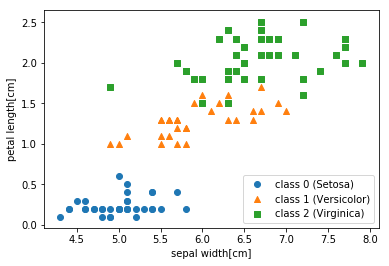

In [271]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

In [272]:
# extension to k-nn
# scale the data for better acurracy
# we use sklearn for testing purposes
import sklearn.preprocessing as sk
scaler = sk.RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
print(scaled_X_train)
print(scaled_X_test)

[[ 0.07142857  0.125     ]
 [ 0.         -0.0625    ]
 [ 0.71428571  0.5       ]
 [-0.78571429 -0.6875    ]
 [ 0.78571429  0.625     ]
 [-0.57142857 -0.4375    ]
 [-0.28571429 -0.6875    ]
 [-0.57142857 -0.1875    ]
 [ 0.5         0.3125    ]
 [ 0.64285714  0.75      ]
 [ 0.14285714  0.125     ]
 [ 0.64285714  0.3125    ]
 [-0.14285714 -0.125     ]
 [ 1.35714286  0.625     ]
 [ 0.35714286  0.1875    ]
 [-0.21428571 -0.125     ]
 [ 0.35714286  0.3125    ]
 [ 0.35714286  0.125     ]
 [-0.64285714  0.25      ]
 [ 0.35714286  0.375     ]
 [ 0.85714286  0.0625    ]
 [ 0.5         0.4375    ]
 [ 0.14285714  0.1875    ]
 [-0.71428571 -0.6875    ]
 [ 0.          0.375     ]
 [-0.14285714  0.        ]
 [-0.14285714  0.        ]
 [-0.21428571  0.        ]
 [ 0.21428571  0.0625    ]
 [ 1.          0.3125    ]
 [-0.35714286 -0.6875    ]
 [-1.07142857 -0.75      ]
 [ 0.42857143  0.375     ]
 [-0.07142857 -0.0625    ]
 [-0.28571429 -0.6875    ]
 [-0.07142857 -0.5625    ]
 [ 0.78571429  0.125     ]
 

In [285]:
# implementation of the RobustScaler
# this scaling method is based on the median and quartile range
# compare results with sklearn method
def Robust_Scaler(X):
    cp = np.copy(X)
    XT = np.transpose(cp)
    for i in range(len(XT)):
        q1 = np.quantile(XT[i], 0.25)
        q3 = np.quantile(XT[i], 0.75)
        denominator = q3 - q1
        for j in range(len(XT[i])):
            XT[i][j] = (XT[i][j] - q1)/denominator
    med = np.median(XT, axis=1)
    centered = XT - med[:, np.newaxis]
    return np.transpose(centered)

scaled_X = Robust_Scaler(X_train)
scaled_X2 = Robust_Scaler(X_test)
print(scaled_X)
print(scaled_X2)

[[ 0.07142857  0.125     ]
 [ 0.         -0.0625    ]
 [ 0.71428571  0.5       ]
 [-0.78571429 -0.6875    ]
 [ 0.78571429  0.625     ]
 [-0.57142857 -0.4375    ]
 [-0.28571429 -0.6875    ]
 [-0.57142857 -0.1875    ]
 [ 0.5         0.3125    ]
 [ 0.64285714  0.75      ]
 [ 0.14285714  0.125     ]
 [ 0.64285714  0.3125    ]
 [-0.14285714 -0.125     ]
 [ 1.35714286  0.625     ]
 [ 0.35714286  0.1875    ]
 [-0.21428571 -0.125     ]
 [ 0.35714286  0.3125    ]
 [ 0.35714286  0.125     ]
 [-0.64285714  0.25      ]
 [ 0.35714286  0.375     ]
 [ 0.85714286  0.0625    ]
 [ 0.5         0.4375    ]
 [ 0.14285714  0.1875    ]
 [-0.71428571 -0.6875    ]
 [ 0.          0.375     ]
 [-0.14285714  0.        ]
 [-0.14285714  0.        ]
 [-0.21428571  0.        ]
 [ 0.21428571  0.0625    ]
 [ 1.          0.3125    ]
 [-0.35714286 -0.6875    ]
 [-1.07142857 -0.75      ]
 [ 0.42857143  0.375     ]
 [-0.07142857 -0.0625    ]
 [-0.28571429 -0.6875    ]
 [-0.07142857 -0.5625    ]
 [ 0.78571429  0.125     ]
 

# Your code goes here

In [87]:
# euclidean distance function
def euclidean_distance(x1, x2):
  #### TO-DO #####
    result = 0
    for i in range(len(x1)):
        diff = x1[i] - x2[i]
        sq = np.square(diff)
        result = result + sq
    return np.sqrt(result)
  ##############

In [88]:
# find k-nearest neighbors
# returns a 2-dimenstional array containing the labels of the k-nearest neighbors for each test sample
def get_neighbors( X_train, y_train, x_test, k, dist_func):
  #### TO-DO #####
    distances = []
    neighbors = [[0 for i in range(k)] for j in range(len(x_test))]
    arr = []
    arr2 = []
    for i in range(len(x_test)):
        for j in range(len(X_train)):
            d = dist_func(x_test[i], X_train[j])
            distances.append(d)
        arr.append(distances.copy())
        arr2.append(distances.copy())
        distances.clear()
    for a in range(len(x_test)):
        for b in range(k):
            mn = min(arr[a])
            index = arr2[a].index(mn)
            neighbors[a][b] = y_train[index]
            arr[a].remove(mn)
  ##############
    return neighbors

In [89]:
  #### TO-DO ##### 
# finds the mode of the labels for k-nearest neighbors for each test sample
# returns the mode for each sample as the predicted label
# for k = 1, this step can be skipped
def predict(y_pred):
    predictions = []
    for i in range(len(y_pred)):
        mode = max(set(y_pred[i]), key = y_pred[i].count)
        predictions.append(mode)
    return predictions

In [90]:
# compares the predicted labels for each sample with their actual given labels
# returns which samples were predicted incorrectly, along with the number and percentage of incorrect predictions
def compare(predictions, y_test, x_test):
    incorrect = 0
    examples = []
    for i in range(len(predictions)):
        if predictions[i] != y_test[i]:
            examples.append(x_test[i])
            incorrect += 1
    return examples, incorrect, incorrect/len(predictions)

In [108]:
# predictions for k = 1
ts1 = get_neighbors(X_train, y_train, X_test, 1, euclidean_distance)
print(ts1)
error_rate1 = compare(ts1, y_test, X_test)
print(error_rate1)

[[2], [1], [0], [2], [0], [2], [0], [1], [1], [1], [1], [2], [1], [1], [1], [0], [2], [1], [0], [0], [2], [1], [0], [0], [2], [0], [0], [1], [1], [0], [2], [1], [0], [2], [2], [1], [0], [1]]
([array([6.1, 1.4]), array([6.4, 1.5]), array([6. , 1.5])], 3, 0.07894736842105263)


In [109]:
# predictions for k = 1
# scaled
ts1 = get_neighbors(scaled_X, y_train, scaled_X2, 1, euclidean_distance)
print(ts1)
error_rate1 = compare(ts1, y_test, X_test)
print(error_rate1)

[[2], [1], [0], [2], [0], [2], [0], [1], [1], [1], [1], [1], [1], [1], [1], [0], [1], [1], [0], [0], [2], [1], [0], [0], [2], [0], [0], [1], [1], [0], [2], [1], [0], [2], [2], [1], [0], [1]]
([array([6.1, 1.4])], 1, 0.02631578947368421)


In [110]:
# predictions for k = 3
ts2 = get_neighbors(X_train, y_train, X_test, 3, euclidean_distance)
print(ts2)
pr2 = predict(ts2)
print(pr2)
error_rate2 = compare(pr2, y_test, X_test)
print(error_rate2)

[[2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 2], [1, 2, 1], [2, 2, 1], [1, 1, 1], [1, 2, 2], [1, 2, 1], [0, 0, 0], [2, 1, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [2, 2, 2], [1, 1, 1], [0, 0, 0], [1, 2, 1]]
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]
([array([6.1, 1.4]), array([6.4, 1.5]), array([6.5, 1.5])], 3, 0.07894736842105263)


In [111]:
# predictions for k = 3
# scaled
ts2 = get_neighbors(scaled_X_train, y_train, scaled_X_test, 3, euclidean_distance)
print(ts2)
pr2 = predict(ts2)
print(pr2)
error_rate2 = compare(pr2, y_test, X_test)
print(error_rate2)

[[2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 2, 1], [1, 2, 1], [1, 1, 1], [1, 2, 2], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 2, 2], [0, 0, 0], [1, 1, 2], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 0], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [2, 2, 2], [1, 1, 2], [0, 0, 0], [1, 1, 1]]
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]
([array([6.1, 1.4])], 1, 0.02631578947368421)


In [112]:
# predictions for k = 5
ts3 = get_neighbors(X_train, y_train, X_test, 5, euclidean_distance)
print(ts3)
pr3 = predict(ts3)
print(pr3)
error_rate3 = compare(pr3, y_test, X_test)
print(error_rate3)

[[2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [2, 2, 1, 1, 1], [1, 1, 1, 1, 2], [1, 2, 2, 1, 1], [1, 2, 1, 1, 1], [0, 0, 0, 0, 0], [2, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [2, 2, 2, 2, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 1, 1, 1, 2], [1, 1, 1, 0, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [1, 2, 1, 2, 2]]
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]
([array([6.1, 1.4]), array([6. , 1.6])], 2, 0.05263157894736842)


In [113]:
# predictions for k = 5
# scaled
ts3 = get_neighbors(scaled_X_train, y_train, scaled_X_test, 5, euclidean_distance)
print(ts3)
pr3 = predict(ts3)
print(pr3)
error_rate3 = compare(pr3, y_test, X_test)
print(error_rate3)

[[2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [1, 2, 1, 2, 1], [1, 2, 1, 2, 1], [1, 1, 1, 2, 2], [1, 2, 2, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 2, 2], [1, 1, 1, 1, 1], [1, 2, 2, 1, 1], [0, 0, 0, 0, 0], [1, 1, 2, 1, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 1, 1, 1, 2], [1, 1, 0, 1, 0], [0, 0, 0, 0, 0], [2, 2, 2, 2, 1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [1, 1, 2, 1, 1], [0, 0, 0, 0, 0], [1, 1, 1, 2, 2]]
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]
([array([6.1, 1.4])], 1, 0.02631578947368421)


In [ ]:
# zero R algorithm 
# predicts the most common training label as the label for every sample in the training set
def zero_r(y):
    labels = []
    ls = y.tolist()
    mode = max(set(ls), key = ls.count)
    for i in range(len(X_test)):
        labels.append(mode)
    return labels
zero = zero_r(y_train)
print(zero)
zero_rate = compare(zero, y_test, X_test)
print(zero_rate)

In [201]:
# manhattan distance function
def manhattan_distance(x1, x2):
    result = 0
    for i in range(len(x1)):
        diff = x1[i] - x2[i]
        if diff < 0:
            diff *= -1
        result += diff
    return result

In [ ]:
# predictions for k = 1, using manhattan distance
tm = get_neighbors(X_train, y_train, X_test, 1, manhattan_distance)
print(tm)
err = compare(tm, y_test, X_test)
print(err)

In [ ]:
# predictions for k = 3, using manhattan distance
tm2 = get_neighbors(X_train, y_train, X_test, 3, manhattan_distance)
print(tm2)
p = predict(tm2)
err2 = compare(p, y_test, X_test)
print(err2)

In [ ]:
# predictions for k = 5, using manhattan distance
tm3 = get_neighbors(X_train, y_train, X_test, 5, manhattan_distance)
print(tm3)
p2 = predict(tm3)
err3 = compare(p2, y_test, X_test)
print(err3)

In [2]:
# 5-fold cross validation
# divide training model into 5 parts and store it in a multi-dimensional array
def split_data(model, labels, pos1, pos2):
    xtest = model[pos1:pos2]
    xtrain = model.tolist()
    ytrain = labels.tolist()
    ytest = labels[pos1:pos2]
    del xtrain[pos1:pos2]
    del ytrain[pos1:pos2]
    return xtrain, ytrain, xtest, ytest

In [262]:
split1 = split_data(X_train, y_train, 0, 22)
split2 = split_data(X_train, y_train, 22, 44)
split3 = split_data(X_train, y_train, 44, 66)
split4 = split_data(X_train, y_train, 66, 88)
split5 = split_data(X_train, y_train, 88, 112)

In [312]:
# data scaled by scikit
split1 = split_data(scaled_X_train, y_train, 0, 22)
split2 = split_data(scaled_X_train, y_train, 22, 44)
split3 = split_data(scaled_X_train, y_train, 44, 66)
split4 = split_data(scaled_X_train, y_train, 66, 88)
split5 = split_data(scaled_X_train, y_train, 88, 112)

In [304]:
# data scaled by original implementation
split1 = split_data(scaled_X, y_train, 0, 22)
split2 = split_data(scaled_X, y_train, 22, 44)
split3 = split_data(scaled_X, y_train, 44, 66)
split4 = split_data(scaled_X, y_train, 66, 88)
split5 = split_data(scaled_X, y_train, 88, 112)

In [313]:
# 5-fold cross validation where k = 1
sp1 = get_neighbors(split1[0], split1[1], split1[2], 1, euclidean_distance)
pd1 = predict(sp1)
new_err1 = compare(pd1, split1[3], split1[2])
sp2 = get_neighbors(split2[0], split2[1], split2[2], 1, euclidean_distance)
pd2 = predict(sp2)
new_err2 = compare(pd2, split2[3], split2[2])
sp3 = get_neighbors(split3[0], split3[1], split3[2], 1, euclidean_distance)
pd3 = predict(sp3)
new_err3 = compare(pd3, split3[3], split3[2])
sp4 = get_neighbors(split4[0], split4[1], split4[2], 1, euclidean_distance)
pd4 = predict(sp4)
new_err4 = compare(pd4, split4[3], split4[2])
sp5 = get_neighbors(split5[0], split5[1], split5[2], 1, euclidean_distance)
pd5 = predict(sp5)
new_err5 = compare(pd5, split5[3], split5[2])
total = new_err1[1] + new_err2[1] + new_err3[1] + new_err4[1] + new_err5[1]
total_error = total/112
print(total)
print(total_error)

11
0.09821428571428571


In [314]:
# 5-fold cross validation where k = 3
sp1 = get_neighbors(split1[0], split1[1], split1[2], 3, euclidean_distance)
pd1 = predict(sp1)
new_err1 = compare(pd1, split1[3], split1[2])
sp2 = get_neighbors(split2[0], split2[1], split2[2], 3, euclidean_distance)
pd2 = predict(sp2)
new_err2 = compare(pd2, split2[3], split2[2])
sp3 = get_neighbors(split3[0], split3[1], split3[2], 3, euclidean_distance)
pd3 = predict(sp3)
new_err3 = compare(pd3, split3[3], split3[2])
sp4 = get_neighbors(split4[0], split4[1], split4[2], 3, euclidean_distance)
pd4 = predict(sp4)
new_err4 = compare(pd4, split4[3], split4[2])
sp5 = get_neighbors(split5[0], split5[1], split5[2], 3, euclidean_distance)
pd5 = predict(sp5)
new_err5 = compare(pd5, split5[3], split5[2])
total = new_err1[1] + new_err2[1] + new_err3[1] + new_err4[1] + new_err5[1]
total_error = total/112
print(total)
print(total_error)

8
0.07142857142857142


In [315]:
# 5-fold cross validation where k = 5
sp1 = get_neighbors(split1[0], split1[1], split1[2], 5, euclidean_distance)
pd1 = predict(sp1)
new_err1 = compare(pd1, split1[3], split1[2])
sp2 = get_neighbors(split2[0], split2[1], split2[2], 5, euclidean_distance)
pd2 = predict(sp2)
new_err2 = compare(pd2, split2[3], split2[2])
sp3 = get_neighbors(split3[0], split3[1], split3[2], 5, euclidean_distance)
pd3 = predict(sp3)
new_err3 = compare(pd3, split3[3], split3[2])
sp4 = get_neighbors(split4[0], split4[1], split4[2], 5, euclidean_distance)
pd4 = predict(sp4)
new_err4 = compare(pd4, split4[3], split4[2])
sp5 = get_neighbors(split5[0], split5[1], split5[2], 5, euclidean_distance)
pd5 = predict(sp5)
new_err5 = compare(pd5, split5[3], split5[2])
total = new_err1[1] + new_err2[1] + new_err3[1] + new_err4[1] + new_err5[1]
total_error = total/112
print(total)
print(total_error)

7
0.0625


In [316]:
# 5-fold cross validation where k = 7
sp1 = get_neighbors(split1[0], split1[1], split1[2], 7, euclidean_distance)
pd1 = predict(sp1)
new_err1 = compare(pd1, split1[3], split1[2])
sp2 = get_neighbors(split2[0], split2[1], split2[2], 7, euclidean_distance)
pd2 = predict(sp2)
new_err2 = compare(pd2, split2[3], split2[2])
sp3 = get_neighbors(split3[0], split3[1], split3[2], 7, euclidean_distance)
pd3 = predict(sp3)
new_err3 = compare(pd3, split3[3], split3[2])
sp4 = get_neighbors(split4[0], split4[1], split4[2], 7, euclidean_distance)
pd4 = predict(sp4)
new_err4 = compare(pd4, split4[3], split4[2])
sp5 = get_neighbors(split5[0], split5[1], split5[2], 7, euclidean_distance)
pd5 = predict(sp5)
new_err5 = compare(pd5, split5[3], split5[2])
total = new_err1[1] + new_err2[1] + new_err3[1] + new_err4[1] + new_err5[1]
total_error = total/112
print(total)
print(total_error)

8
0.07142857142857142


In [317]:
# 5-fold cross validation where k = 9
sp1 = get_neighbors(split1[0], split1[1], split1[2], 9, euclidean_distance)
pd1 = predict(sp1)
new_err1 = compare(pd1, split1[3], split1[2])
sp2 = get_neighbors(split2[0], split2[1], split2[2], 9, euclidean_distance)
pd2 = predict(sp2)
new_err2 = compare(pd2, split2[3], split2[2])
sp3 = get_neighbors(split3[0], split3[1], split3[2], 9, euclidean_distance)
pd3 = predict(sp3)
new_err3 = compare(pd3, split3[3], split3[2])
sp4 = get_neighbors(split4[0], split4[1], split4[2], 9, euclidean_distance)
pd4 = predict(sp4)
new_err4 = compare(pd4, split4[3], split4[2])
sp5 = get_neighbors(split5[0], split5[1], split5[2], 9, euclidean_distance)
pd5 = predict(sp5)
new_err5 = compare(pd5, split5[3], split5[2])
total = new_err1[1] + new_err2[1] + new_err3[1] + new_err4[1] + new_err5[1]
total_error = total/112
print(total)
print(total_error)

8
0.07142857142857142


In [311]:
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        print("scikit:{0}, Original Implementation:{1}".format(scaled_X[i][j], scaled_X_train[i][j]))

scikit:0.07142857142857184, Original Implementation:0.07142857142857179
scikit:0.125, Original Implementation:0.12499999999999999
scikit:0.0, Original Implementation:0.0
scikit:-0.0625, Original Implementation:-0.06250000000000006
scikit:0.7142857142857142, Original Implementation:0.7142857142857141
scikit:0.5000000000000002, Original Implementation:0.5000000000000001
scikit:-0.7857142857142853, Original Implementation:-0.7857142857142853
scikit:-0.6875, Original Implementation:-0.6875000000000001
scikit:0.7857142857142858, Original Implementation:0.7857142857142859
scikit:0.625, Original Implementation:0.6249999999999999
scikit:-0.5714285714285712, Original Implementation:-0.5714285714285712
scikit:-0.4375, Original Implementation:-0.43750000000000006
scikit:-0.28571428571428525, Original Implementation:-0.28571428571428525
scikit:-0.6875, Original Implementation:-0.6875000000000001
scikit:-0.5714285714285712, Original Implementation:-0.5714285714285712
scikit:-0.1875, Original Implem